In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
(Train_Imgs, Train_Labels), (Test_Imgs, Test_Labels) = mnist.load_data()
Train_Imgs=Train_Imgs/255
Test_Imgs=Test_Imgs/255

The train data set contains 60000 images with the size of 28 * 28.
The test data set contains 10000 images with the size of 28 * 28.
Here are some sample data point:



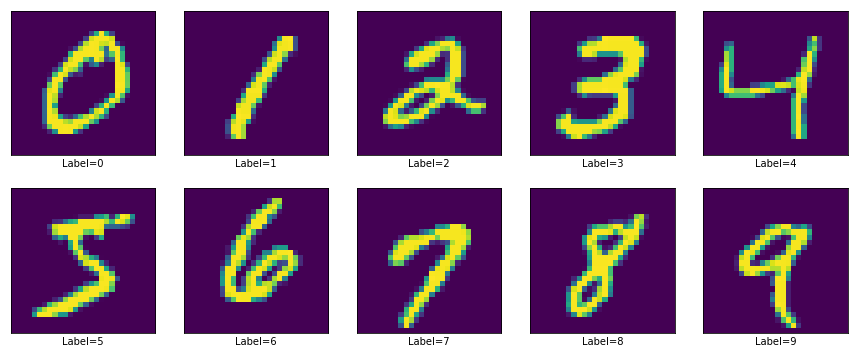

In [2]:
print("The train data set contains {} images with the size of {} * {}.".format(*Train_Imgs.shape))
print("The test data set contains {} images with the size of {} * {}.".format(*Test_Imgs.shape))
print("Here are some sample data point:\n")
f, axes = plt.subplots(2, 5, figsize=(15, 6))
Sample_Indexes=[np.where(Train_Labels==i)[0][0] for i in range(10)]
for i in range(2):
    for j in range(5):
        axes[i,j].imshow(Train_Imgs[Sample_Indexes[i*5+j]])
        axes[i,j].grid(False)
        axes[i,j].set(xlabel="Label={}".format(i*5+j))
        axes[i,j].set_yticklabels([])
        axes[i,j].set_xticklabels([])
        axes[i,j].tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, left=False)

The distribution of the labels both for the train data set, and for the test data set is uniform.

The data set does not suffer from class imbalance, or shift in distribution from train to test.



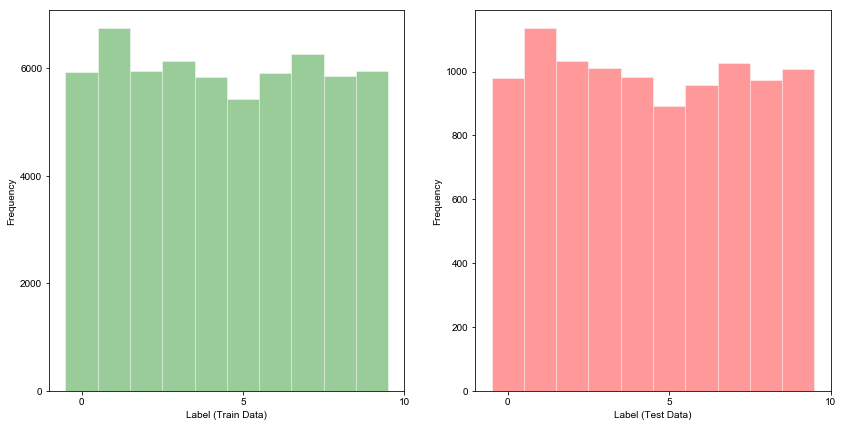

In [3]:
print("The distribution of the labels both for the train data set, and for the test data set is uniform.\n")
print("The data set does not suffer from class imbalance, or shift in distribution from train to test.\n")
f, axes = plt.subplots(1, 2, figsize=(14, 7), sharex=True)
sns.set(font_scale=2.5)
sns.distplot(Train_Labels,kde=False,bins=np.array(range(11))-0.5,ax=axes[0],color="green");
sns.distplot(Test_Labels,kde=False,bins=np.array(range(11))-0.5,ax=axes[1],color='red');
axes[0].set(xlabel="Label (Train Data)",ylabel="Frequency");
axes[1].set(xlabel="Label (Test Data)",ylabel="Frequency");


In [4]:
from tensorflow.keras import models,layers,utils;
Model=models.Sequential()
Model.add(layers.Conv2D(filters=128,kernel_size=(5,5),input_shape=(28,28,1),activation='relu',strides=1,name="First_Conv"))
Model.add(layers.MaxPooling2D((2,2),name="First_Maxpool"))
Model.add(layers.Conv2D(filters=64,kernel_size=(5,5),activation='relu',strides=1,name="Second_Conv"))
Model.add(layers.MaxPooling2D((2,2),name="Second_Maxpool"))
Model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',strides=1,name="Third_Conv"))
Model.add(layers.MaxPooling2D((2,2),name="Third_Maxpool"))
Model.add(layers.Flatten(name="Flattener"))
Model.add(layers.Dense(units=10,activation='softmax',name="Fist_Dense"))
Model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
First_Conv (Conv2D)          (None, 24, 24, 128)       3328      
_________________________________________________________________
First_Maxpool (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
Second_Conv (Conv2D)         (None, 8, 8, 64)          204864    
_________________________________________________________________
Second_Maxpool (MaxPooling2D (None, 4, 4, 64)          0         
_________________________________________________________________
Third_Conv (Conv2D)          (None, 2, 2, 32)          18464     
_________________________________________________________________
Third_Maxpool (MaxPooling2D) (None, 1, 1, 32)          0         
_________________________________________________________________
Flat

In [5]:
Train_Imgs = Train_Imgs.reshape((-1, 28, 28, 1))
Test_Imgs=Test_Imgs.reshape((-1,28,28,1))
Train_Labels = utils.to_categorical(Train_Labels)
Test_Labels = utils.to_categorical(Test_Labels)

In [6]:
Model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']);
Model.fit(Train_Imgs, Train_Labels, epochs=5, batch_size=128);

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 208s 3ms/sample - loss: 0.2238 - acc: 0.9306
Epoch 2/5
60000/60000 [==============================] - 209s 3ms/sample - loss: 0.0561 - acc: 0.9832
Epoch 3/5
60000/60000 [==============================] - 210s 4ms/sample - loss: 0.0386 - acc: 0.9882
Epoch 4/5
60000/60000 [==============================] - 210s 4ms/sample - loss: 0.0290 - acc: 0.9911
Epoch 5/5
60000/60000 [==============================] - 213s 4ms/sample - loss: 0.0221 - acc: 0.9934


In [7]:
pred=Model.predict_classes(Test_Imgs)

In [8]:
from sklearn.metrics import confusion_matrix as CM
cm=CM(y_true=Test_Labels.argmax(axis=1),y_pred=pred)
cm=cm/cm.sum(axis=1)[:,None]

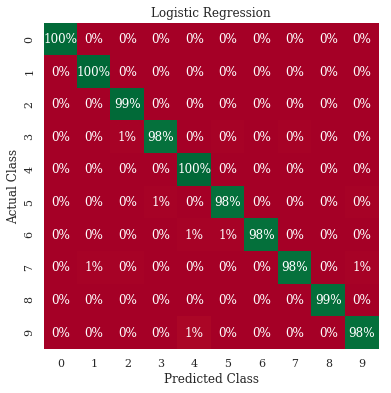

In [9]:
import seaborn as sns
sns.set(font="serif",font_scale=1)
f, ax = plt.subplots(1,1, figsize=(6, 6))
sns.heatmap(cm,cmap="RdYlGn",annot=True,fmt='.0%',cbar=False,ax=ax);
ax.set_xlabel('Predicted Class');
ax.set_ylabel('Actual Class');
ax.set_title('Logistic Regression');